In [1]:
#Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
#Load the dataset
file_path = 'german_credit_data.csv'
data = pd.read_csv(file_path)

Perform EDA and any data cleaning if necessary

In [4]:
#Perform EDA
print("Dataset Overview:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

#Perform Data Cleaning
# Fill missing values if any
data['Saving accounts'] = data['Saving accounts'].fillna('unknown')
data['Checking account'] = data['Checking account'].fillna('unknown')

Dataset Overview:
    Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own         unknown           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little          unknown   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------         

Perform one hot encoding for categorical variables

In [5]:
# One-hot encoding for categorical variables
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Purpose', 'Checking account']
encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Visualise the histograms of numerical features.

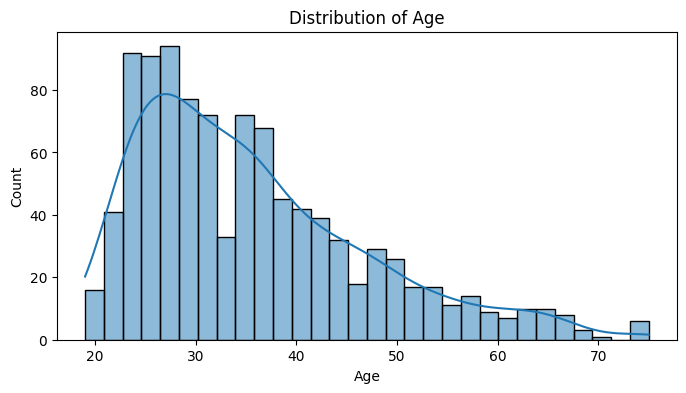

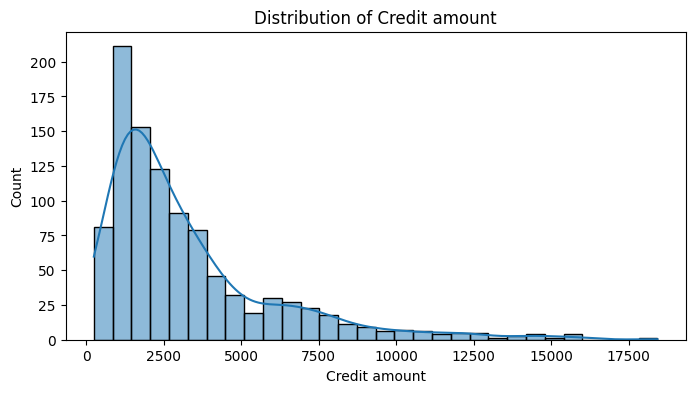

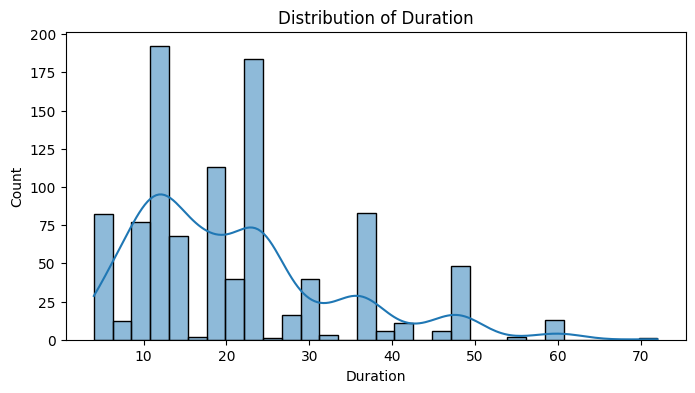

In [6]:
#Visualize histograms and apply log transformation if needed
numerical_cols = ['Age', 'Credit amount', 'Duration']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Apply log transformation to skewed data (Example: Here Credit amount)
data['Log_Credit_amount'] = np.log1p(data['Credit amount'])

Apply Feature Scaling.

In [7]:
scaler = StandardScaler()
numerical_data = data[['Age', 'Log_Credit_amount', 'Duration']]
scaled_data = scaler.fit_transform(numerical_data)

Apply elbow method to find best number of clusters.

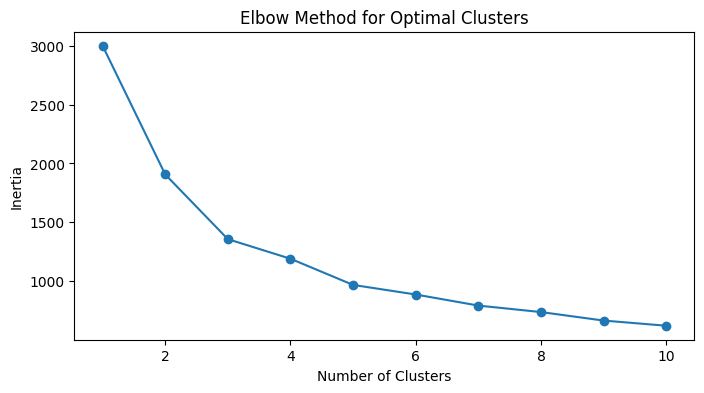

In [8]:
#Clustering (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

Visualization using PCA

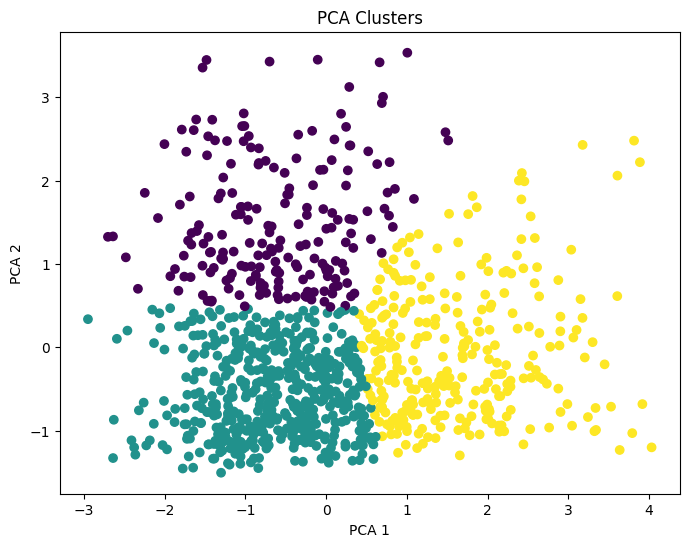

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Clusters')
plt.show()

Use the Random Forest Classifer and report the evaluation metrics

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.32      0.42        59
           1       0.76      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200

Confusion Matrix:
 [[ 19  40]
 [ 12 129]]


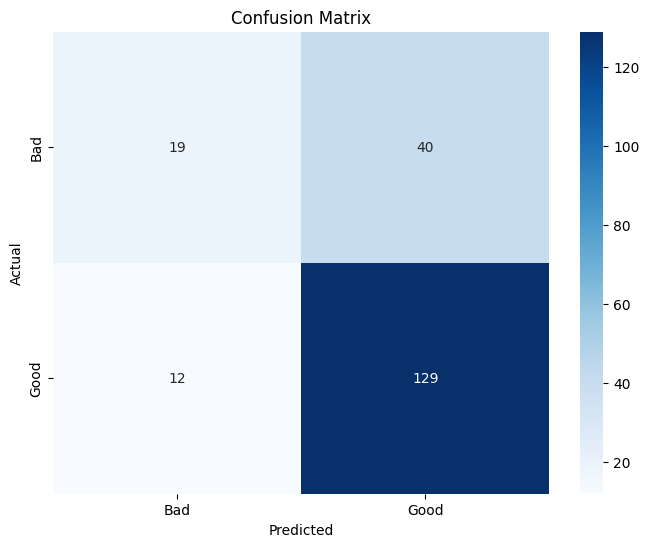

ROC AUC Score: 0.6184637576631806


In [13]:
# Splitting the data
X = encoded_data.drop(columns=['Risk'])
y = encoded_data['Risk'].apply(lambda x: 1 if x == 'good' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Implement the K-Fold Cross Validation

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.715 0.735 0.65  0.77  0.75 ]
Mean Accuracy: 0.724
